<a href="https://colab.research.google.com/github/Lakshaykumarr28/Machine-Learning-using-Python/blob/main/DL/CNN_model_for_caltech_256_Lakshay_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# git cloning GitHub repo to load dataset folders.

In [1]:
!git clone https://github.com/Lakshaykumarr28/Machine-Learning-using-Python

Cloning into 'Machine-Learning-using-Python'...
remote: Enumerating objects: 46945, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 46945 (delta 1), reused 4 (delta 1), pack-reused 46936
Receiving objects: 100% (46945/46945), 1.20 GiB | 29.94 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (48640/48640), done.


# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers, models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import cv2
import os, shutil
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Loading the dataset folder

In [3]:
dataset_path = '/content/Machine-Learning-using-Python/256_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(dataset_path))]

print(len(folder_names)) # 257 = 256 categories + background

257


Loading some example images

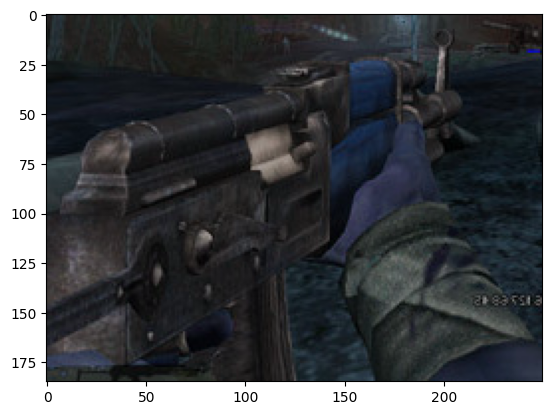

In [4]:
image_path = '/content/Machine-Learning-using-Python/256_ObjectCategories/001.ak47/001_0004.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()

In [5]:
print(image.shape)

(185, 250, 3)


# Creating directories

In [6]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i, category in enumerate(folder_names):
    category_dict[i] = category

    folder_path = dataset_path + '/' + category
    #image_names = [os.path.join(folder_path, img) for img in sorted(os.listdir(folder_path))]
    image_names = [img for img in sorted(os.listdir(folder_path))]

    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names

    print('%s: %d' %(category, images_per_category_dict[i]))
    total_images += images_per_category_dict[i]

print('Total images in dataset: %d' %(total_images))

001.ak47: 98
002.american-flag: 97
003.backpack: 151
004.baseball-bat: 127
005.baseball-glove: 148
006.basketball-hoop: 90
007.bat: 106
008.bathtub: 232
009.bear: 102
010.beer-mug: 94
011.billiards: 278
012.binoculars: 216
013.birdbath: 98
014.blimp: 86
015.bonsai-101: 122
016.boom-box: 91
017.bowling-ball: 104
018.bowling-pin: 101
019.boxing-glove: 124
020.brain-101: 83
021.breadmaker: 142
022.buddha-101: 97
023.bulldozer: 110
024.butterfly: 112
025.cactus: 114
026.cake: 106
027.calculator: 100
028.camel: 110
029.cannon: 103
030.canoe: 104
031.car-tire: 90
032.cartman: 101
033.cd: 102
034.centipede: 100
035.cereal-box: 87
036.chandelier-101: 106
037.chess-board: 120
038.chimp: 110
039.chopsticks: 85
040.cockroach: 124
041.coffee-mug: 87
042.coffin: 87
043.coin: 124
044.comet: 121
045.computer-keyboard: 85
046.computer-monitor: 133
047.computer-mouse: 94
048.conch: 103
049.cormorant: 106
050.covered-wagon: 97
051.cowboy-hat: 114
052.crab-101: 85
053.desk-globe: 82
054.diamond-ring: 118

In [7]:
# create the directories to use
base_path = './split_dataset'
os.mkdir(base_path)

train_dir = os.path.join(base_path, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_path, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_path, 'test')
os.mkdir(test_dir)

In [8]:
# create the categories files in each

for directory in [train_dir, validation_dir, test_dir]:
    for category in folder_names:
        os.mkdir(os.path.join(directory, category))

In [9]:
# calculate the number of images to place in each train/valid/test categories folder

total_train = 0
total_validation = 0
total_test = 0

total_train_2 = 0
total_validation_2 = 0
total_test_2 = 0

for i, category in enumerate(folder_names):
    train_number = int(0.7 * images_per_category_dict[i])
    validation_number = int(0.2 * images_per_category_dict[i])
    test_number = images_per_category_dict[i] - train_number - validation_number # for not exceeding maximum number

    # for statistics later
    total_train += train_number
    total_validation += validation_number
    total_test += test_number

    # now copy these images to respective folders
    # Copy first 1000 cat images to train_cats_dir
    fnames = category_images_path_dict[i][:train_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(train_dir, category, fname)
        shutil.copyfile(src, dst)

    total_train_2 += len(fnames)

    fnames = category_images_path_dict[i][train_number:train_number + validation_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(validation_dir, category, fname)
        shutil.copyfile(src, dst)

    total_validation_2 += len(fnames)

    fnames = category_images_path_dict[i][train_number + validation_number:]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(test_dir, category, fname)
        shutil.copyfile(src, dst)

    total_test_2 += len(fnames)

In [10]:
# print statistics

print('Correct train split: ', total_train == total_train_2)
print('Correct validation split: ', total_validation == total_validation_2)
print('Correct test split: ', total_test == total_test_2)
print()
print('Number of training images: ', total_train)
print('Number of validation images: ', total_validation)
print('Number of test images: ', total_test)
print()
print('Real percentage of training images: ', total_train / total_images)
print('Real percentage of validation images: ', total_validation / total_images)
print('Real percentage of test images: ', total_test / total_images)

Correct train split:  True
Correct validation split:  True
Correct test split:  True

Number of training images:  21308
Number of validation images:  6027
Number of test images:  3273

Real percentage of training images:  0.6961578672242551
Real percentage of validation images:  0.1969093047569263
Real percentage of test images:  0.10693282801881861


# Data preprocesssing

In [11]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 21308 images belonging to 257 classes.
Found 6027 images belonging to 257 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 257)


# Creating a basic CNN model.

In [13]:
#adding a data augumentation layer

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [14]:
# to make the model reproducible
random.seed(0)

#creating the model
model = Sequential([
    layers.Conv2D(512, (3,3), activation = 'relu', input_shape = (150,150,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(257, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 512)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 512)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 256)      

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 150,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=80)

Epoch 1/50


<ipython-input-18-010a27ccae82>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


150/150 [==============================] - 39s 258ms/step - loss: 5.4381 - acc: 0.0280 - val_loss: 5.4307 - val_acc: 0.0294
Epoch 2/50
150/150 [==============================] - 38s 251ms/step - loss: 5.4309 - acc: 0.0267 - val_loss: 5.3877 - val_acc: 0.0306
Epoch 3/50
150/150 [==============================] - 38s 251ms/step - loss: 5.4096 - acc: 0.0264 - val_loss: 5.3738 - val_acc: 0.0338
Epoch 4/50
150/150 [==============================] - 38s 250ms/step - loss: 5.3358 - acc: 0.0343 - val_loss: 5.3301 - val_acc: 0.0338
Epoch 5/50
150/150 [==============================] - 44s 291ms/step - loss: 5.3251 - acc: 0.0338 - val_loss: 5.3001 - val_acc: 0.0544
Epoch 6/50
150/150 [==============================] - 37s 245ms/step - loss: 5.2580 - acc: 0.0427 - val_loss: 5.2406 - val_acc: 0.0531
Epoch 7/50
150/150 [==============================] - 38s 251ms/step - loss: 5.2017 - acc: 0.0573 - val_loss: 5.2186 - val_acc: 0.0594
Epoch 8/50
150/150 [==============================] - 37s 245ms/st

# **Analysis report for CNN model for caltech 256 dataset.**

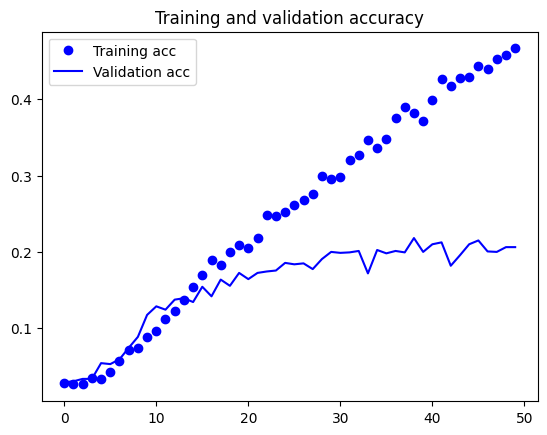

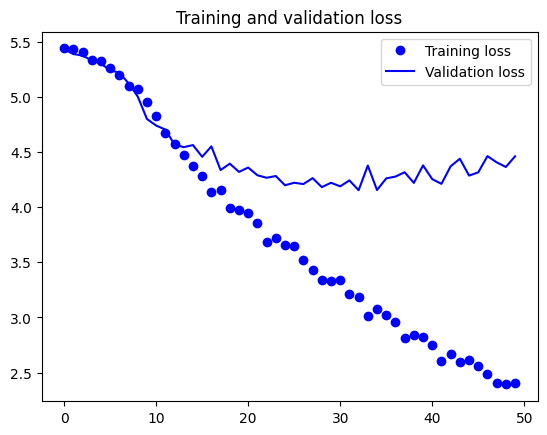

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#plotting for test accuracy and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

#plotting for test loss and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

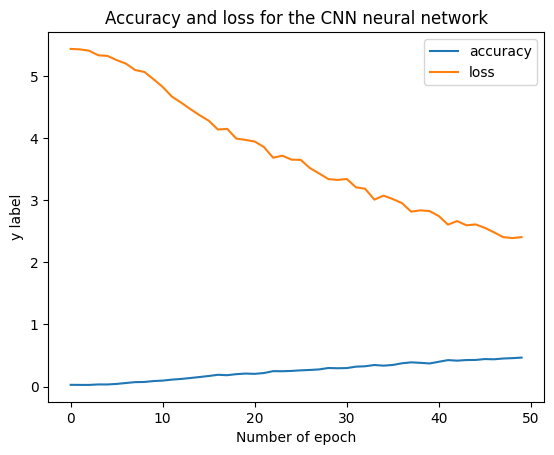

In [27]:
plt.plot(acc)
plt.plot(loss)
plt.title('Accuracy and loss for the CNN neural network')
plt.ylabel('y label')
plt.xlabel('Number of epoch')
plt.legend(['accuracy', 'loss'])
plt.show()

The accuracy for this model is around 50% attained in 50 epochs for the caltech 256 dataset.